O problema analizado é o caixeiro viajante com cidades dispostas ao longo de uma esctrela. O problema é equivalente ao de cidades dispostas ao longo de um circulo, mas com raio variável. Os mínimos continuam sendo os casos em que as cidades seguem ordem crescente ou decrescente.

In [744]:
using Random
using LinearAlgebra
using Plots; gr()
using TimerOutputs
using Waveforms

# Ordem de caminhos inicial aleatoria
cidades = 20
ordem = [1; shuffle(2:cidades)]
ordemHat = copy(ordem)
ordemMin = copy(ordem)

# Estrela com as posicoes de cada cidade
raioBase = 0.8506508
fatorNormalizacao = 1
raioPentagono = (raioBase .+ 0.2*trianglewave.(10*pi.*(0:cidades-1)./(cidades)) .+ 0.2)
x = raioPentagono.*[cos.(2 .* pi .* (0:cidades-1) ./ cidades) sin.(2 .* pi .* (0:cidades-1) ./ cidades)];

HMenorJ = true
N = 1e4
Jatual = 1e6
Jmin = Jatual
Js = []
n = 0
T0 = 1
T = T0
Ts = []
Kmax = 30
distancias = []
temperaturas = []
k = 1
its = 0
ordemOtima = 1:cidades
Jotimo = J(ordemOtima)

7.676882573559672

In [745]:
# O custo é a distancia total percorrida
function J(ordem)
    distTot = 0
    dist = 0
    for i = 2:cidades
        dist = norm(x[ordem[i], :]-x[ordem[i-1], :])
        distTot += dist     
    end
    
    dist = norm(x[ordem[end], :]-x[ordem[1], :])
    
    distTot += dist
    
    return distTot
end

J (generic function with 1 method)

In [746]:
# @time begin
# # Simulated Annealing
time = @elapsed begin
while k < Kmax
    n += 1
    
    # Troca duas cidades de ordem de maneira aleatoria, exceto a primeira que é sempre a mesma
    idx = rand(2:cidades)
    idx2 = rand(2:cidades)
    while idx2 == idx
        idx2 = rand(2:cidades)
    end
    ordemHat = copy(ordem)
    ordemHat[idx], ordemHat[idx2] = ordem[idx2], ordem[idx]
            
    Jit = J(ordemHat)
    
    q = exp((Jatual-Jit)/T)
    r = rand()
    
    if r < q
        ordem = copy(ordemHat)
        Jatual = Jit
    end    
        
    if Jit < Jmin
        Jmin = Jit
        
        ordemMin = copy(ordemHat)
        if (Jmin - Jotimo) < 0.001
            append!(distancias, Jit)
            append!(temperaturas,T)
            break
        end
    end
             
    if n % N == 0
        k += 1

        T = T0/(log2(1 + k))

        if HMenorJ
            ordem = copy(ordemMin)
        end
#         println("Calculando: ", 100/Kmax*k, "%")
    end

    append!(distancias, Jit)
    append!(temperaturas,T)
end
end
println("Tempo necessário:\n", time)

Tempo necessário:
0.9327052


Jmin: 7.676882573559671
Jotimo: 7.676882573559672


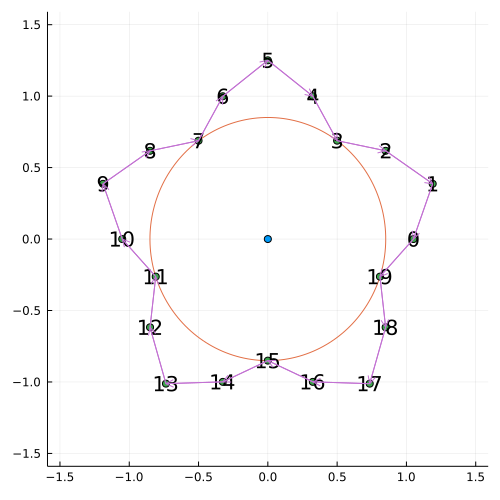

In [747]:

# Visualização do resultado final


println("Jmin: ", Jmin)
println("Jotimo: ", Jotimo)
plot([0], [0], seriestype = :scatter, xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], size = (500, 500), grid = true)
xt(t) = sin(t)*raioBase
yt(t) = cos(t)*raioBase
plot!(xt, yt, 0, 2*pi, leg=false)
plot!(x[:, 1], x[:, 2], seriestype = :scatter, mode="markers+text", text=0:cidades-1)


quiver!(x[ordemMin, 1],x[ordemMin, 2],quiver=(x[[ordemMin[2:end]; 1], 1] - x[ordemMin, 1],x[[ordemMin[2:end]; 1], 2] - x[ordemMin, 2])) 
# quiver!(x[ordemOtima, 1],x[ordemOtima, 2],quiver=(x[[ordemOtima[2:end]; 1], 1] - x[ordemOtima, 1],x[[ordemOtima[2:end]; 1], 2] - x[ordemOtima, 2])) 



In [748]:
step = 1
plot(1:step:length(distancias), distancias[1:step:end], label = "J", lw = 3, size = (500, 200))
plot!(1:step:length(distancias), ones(length(distancias), 1)*Jotimo, label = "Jotimo", lw = 3)
plot!(1:step:length(distancias), temperaturas*maximum(distancias), label = "Temperaturas x max(J)", lw = 3)
# xlabel!("Iterações")
ylabel!("Custo")
savefig(string("custo_", cidades, HMenorJ, ".png"))

In [749]:


otimo = false
if (Jmin - Jotimo) < 0.001
    otimo = true
end
# header: C,T,N,Kmax,Jmin,Tempo,HMenorJ,O
resultados = string(cidades, ",", T0 ,"," , N , "," , Kmax , "," , Jmin , "," , time, ",", HMenorJ, ",", otimo, "\n")
println(resultados)

open("resultados.csv","a") do io
    write(io, resultados)
end;

20,1,10000.0,30,7.676882573559671,0.9327052,true,true

